In [18]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

import visuals as vs 

%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)


Boston housing dataset has 489 data points with 4 variables each.


In [30]:
minimum_price = np.amin(prices)

maximum_price = np.amax(prices)

mean_price = np.mean(prices)

median_price = np.median(prices, axis = 0)

std_price = np.std(prices, axis = 0)

print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


# Comment 
Price should be positively correlated with RM whereas LSTAT and PTRATIO should be negatively correlated. Lower income and less teacher in relation to students should lower the price of houses. 

In [31]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    score = r2_score(y_true, y_predict)  
    
    return score

In [32]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

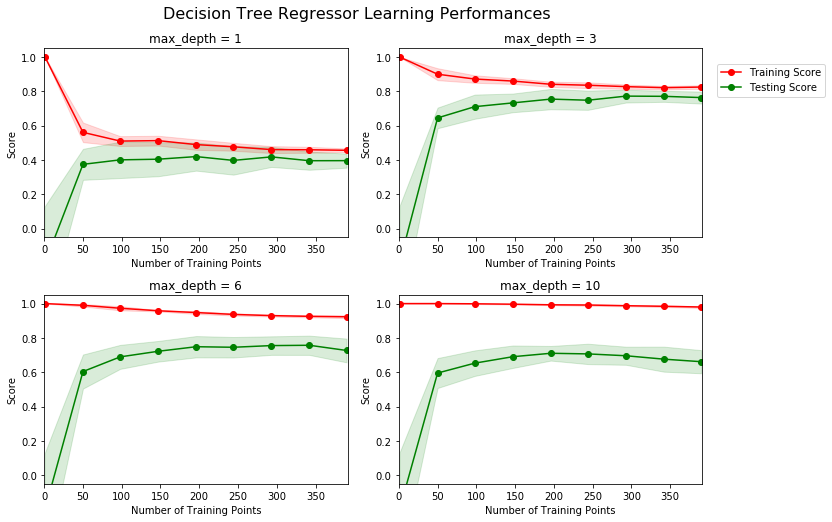

In [34]:
vs.ModelLearning(features, prices)

### Comments on figure
With a maximum depth of 1 the bias of the model is high. Depth 6 and 10 on the other hand gives high variance, depth 3 is a good trade off with low variance and low bias.

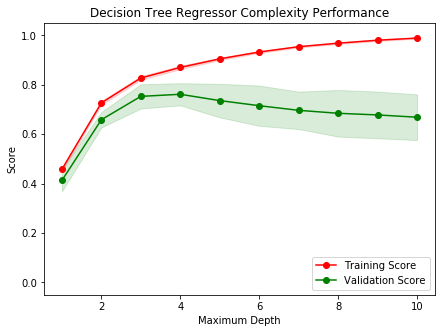

In [35]:
vs.ModelComplexity(X_train, y_train)

In [46]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, Y):
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    regressor = DecisionTreeRegressor()
    
    rng = np.arange(1,11)
    params = {'max_depth': rng}
    
    scoring_fnc = make_scorer(performance_metric)
    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring=scoring_fnc ,
                        cv = cv_sets)
    
    grid = grid.fit(X, Y)
    
    return grid.best_estimator_
    

In [47]:
reg = fit_model(X_train, y_train)

print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


In [48]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [49]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
